# Sample Growth

This notebook looks at the growth of Ribo-Seq on public repositories to date and attempts to project sample growth into the future. 

In [42]:
!pip install pandas seaborn scikit-learn 

In [43]:
import pandas as pd
import seaborn as sns

In [44]:
metadata_df = pd.read_csv('../data/Cleaned_Metadata_For_Upload.csv')
metadata_df.head()

/tmp/ipykernel_447196/3829933248.py:1: DtypeWarning: Columns (37,39,40,41,63,72,73,78,81,83) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv('../data/Cleaned_Metadata_For_Upload.csv')


,Run,spots,bases,avgLength,size_MB,LibraryName,LibraryStrategy,LibrarySelection,LibrarySource,LibraryLayout,...,Host,UMI,Adapter,Separation,rRNA_depletion,Barcode,Monosome_purification,Nuclease,Kit,Info
0,DRR244662,50599092,3845530992,76.0,1273,Ribosome profiling,RNA-Seq,RANDOM,TRANSCRIPTOMIC,SINGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT01_NoTrim_S1_R1_001
1,DRR244663,50768935,3858439060,76.0,1269,Ribosome profiling,RNA-Seq,RANDOM,TRANSCRIPTOMIC,SINGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT02_NoTrim_S2_R1_001
2,DRR255640,53029459,1837645023,34.0,792,NaN,RNA-Seq,size fractionation,TRANSCRIPTOMIC,SINGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ribo-seq_WT_rep1_Ribosome footprints
3,DRR255641,60864576,2145161510,35.0,874,NaN,RNA-Seq,size fractionation,TRANSCRIPTOMIC,SINGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ribo-seq_WT_rep2_Ribosome footprints
4,DRR255642,55434616,1923586815,34.0,828,NaN,RNA-Seq,size fractionation,TRANSCRIPTOMIC,SINGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ribo-seq_pgr3-1_rep1_Ribosome footprints


In [45]:
# get number of samples per year 
year_counts = metadata_df.groupby('YEAR').size().reset_index(name='counts')

/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


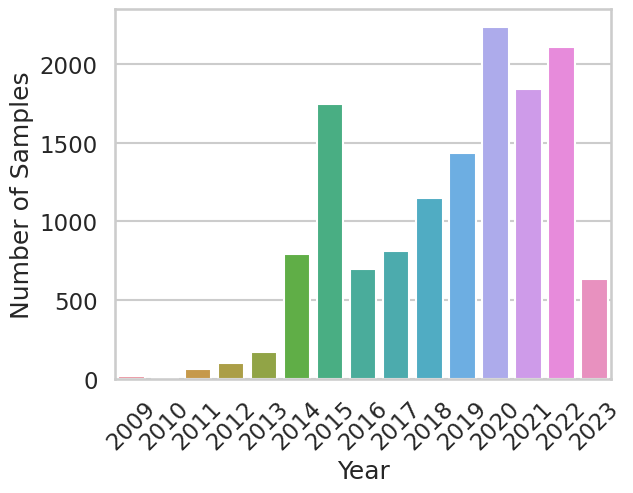

In [46]:
# plot number of samples per year
sns.set_style("whitegrid") 
sns.set_context("talk")
sns.set_palette("colorblind")

ax = sns.barplot(x="YEAR", y="counts", data=year_counts)
ax.set(xlabel='Year', ylabel='Number of Samples')

# rotate x-axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

    

/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


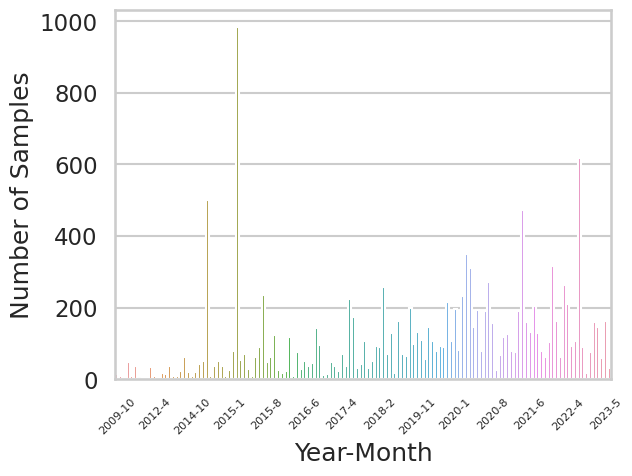

In [47]:
# create a new column with year and month combined 
metadata_df['YEAR_MONTH'] = metadata_df['YEAR'].astype(str) + '-' + metadata_df['MONTH'].astype(str)

# get number of samples per year-month
year_month_counts = metadata_df.groupby('YEAR_MONTH').size().reset_index(name='counts')

# plot number of samples per year-month
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")

ax = sns.barplot(x="YEAR_MONTH", y="counts", data=year_month_counts)
ax.set(xlabel='Year-Month', ylabel='Number of Samples')

# rotate x-axis labels and make them smaller
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_fontsize(8)

#drop 90% of the x labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_

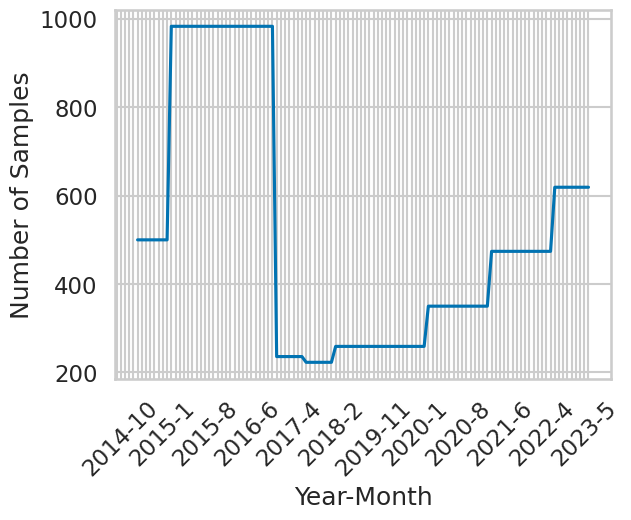

In [58]:
# smooth the data by taking a rolling average
year_month_counts['counts_smoothed'] = year_month_counts['counts'].rolling(25).mean()

# plot number of samples per year-month
sns.set_style("whitegrid") 
sns.set_context("talk")
sns.set_palette("colorblind")

ax = sns.lineplot(x="YEAR_MONTH", y="counts_smoothed", data=year_month_counts)
ax.set(xlabel='Year-Month', ylabel='Number of Samples')

#drop 90% of the x labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    label.set_rotation(45)

/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_

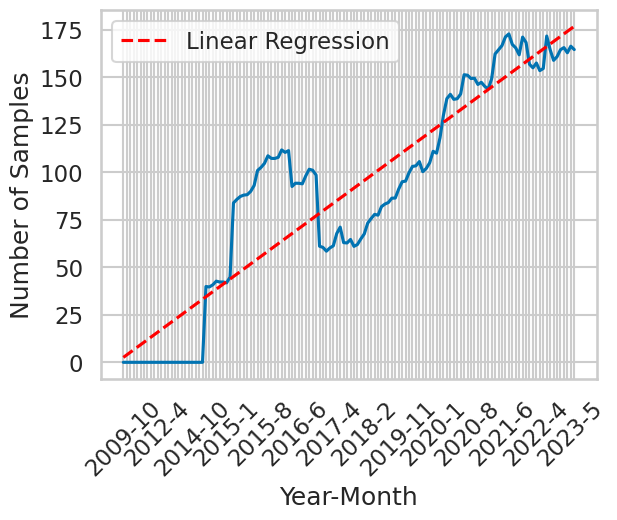

In [54]:
# fit a linear regression to the data
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # Import plt from Matplotlib

# Get Months since first sample and replace Nan with 0
year_month_counts['MONTHS_SINCE_FIRST_SAMPLE'] = range(0, len(year_month_counts))

# Replace NaN with 0
year_month_counts = year_month_counts.fillna(0)



# Fit a linear regression to the data
reg = LinearRegression().fit(year_month_counts[['MONTHS_SINCE_FIRST_SAMPLE']], year_month_counts['counts_smoothed'])

# Generate predictions from the linear regression model and plot into the future
months_since_first_sample = pd.DataFrame({'MONTHS_SINCE_FIRST_SAMPLE': range(0, 132)})
predictions = reg.predict(months_since_first_sample)

# Create the lineplot
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")

ax = sns.lineplot(x="YEAR_MONTH", y="counts_smoothed", data=year_month_counts)
ax.set(xlabel='Year-Month', ylabel='Number of Samples')

# Drop 90% of the x labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    label.set_rotation(45)
    


# Plot the linear regression line on top of the lineplot
plt.plot(year_month_counts['YEAR_MONTH'], predictions, label='Linear Regression', linestyle='--', color='red')
plt.legend()

# Show the plot
plt.show()


/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jack/projects/RiboSeqOrg-Projections/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_

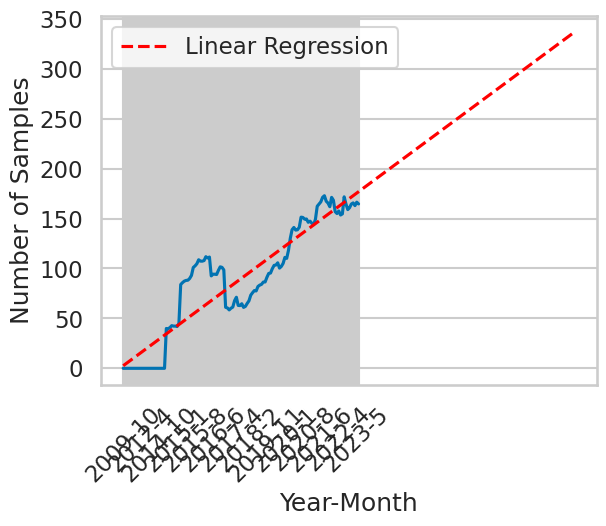

In [55]:
# Predict into the future

months_since_first_sample = pd.DataFrame({'MONTHS_SINCE_FIRST_SAMPLE': range(0, 252)})
predictions = reg.predict(months_since_first_sample)

# plot predictions
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")

ax = sns.lineplot(x="YEAR_MONTH", y="counts_smoothed", data=year_month_counts)
ax.set(xlabel='Year-Month', ylabel='Number of Samples')

# drop 90% of the x labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    label.set_rotation(45)

# plot predictions
plt.plot(months_since_first_sample['MONTHS_SINCE_FIRST_SAMPLE'], predictions, label='Linear Regression', linestyle='--', color='red')
plt.legend()


In [57]:
# get total samples by 2030
total_samples_2030 = sum(predictions)
print('Total samples by 2030: ', total_samples_2030)

Total samples by 2030:  42730.42005770846
